# Wrangling and Analyzing WeRateDogs Twitter Archive
Real world data rarely comes clean. Using Python and its libraries,I will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. I will document my wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python. The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

I will follow the Gather, Assess, and Clean model for wrangling this data. With the clean data, we will see what insights can be made of the data from WeRateDogs Twitter Archive.

## Gather

First lets import the majority of libraries we will need. 

In [1]:
import pandas as pd
import numpy as np 
import os 
import glob
import json
import requests

Read in to a dataframe Twitter Archive Enhanced

In [2]:
df = pd.read_csv('C:/Users/sethb/OneDrive/Documents/Udacity_Real/Data_Wrangling/wrangling_project/Wrangle-and-Analyze-Data/twitter-archive-enhanced.csv')
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


Download the image_predictions URL from Udacity's servers.

In [3]:
image_predictions_url = ['https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv']

Make a directory to store the predictions

In [4]:
folder_name = 'predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

Use requests library and os to access the image_predictions_url and write all the data to the folder predictions as the file 'image_predictions.tsv'

In [5]:
for url in image_predictions_url:
    response = requests.get(url)
    with open(os.path.join(folder_name, url.split('/')[-1]), mode ='wb') as file:
        file.write(response.content)

read in text file given by Udacity full of tweet data. I tried to do the other way for five hours. It kept saying every tweet communication failed and was showing no tweets. 

In [6]:
df_tweet_json = pd.read_fwf('C:/Users/sethb/OneDrive/Documents/Udacity_Real/Data_Wrangling/wrangling_project/Wrangle-and-Analyze-Data/tweet_json.txt')

In [7]:
df_tweet_json.head()

,"{""created_at"":","""Tue",Aug,01,16:23:56,+0000,"2017"",","""id"":","892420643555336193,","""id_str"":",...,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68
0,"{""created_at"":","""Tue",Aug,1,00:17:27,0,"2017"",","""id"":","892177421306343426,","""id_str"":",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{""created_at"":","""Mon",Jul,31,00:18:03,0,"2017"",","""id"":","891815181378084864,","""id_str"":",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{""created_at"":","""Sun",Jul,30,15:58:51,0,"2017"",","""id"":","891689557279858688,","""id_str"":",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{""created_at"":","""Sat",Jul,29,16:00:24,0,"2017"",","""id"":","891327558926688256,","""id_str"":",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{""created_at"":","""Sat",Jul,29,00:08:17,0,"2017"",","""id"":","891087950875897856,","""id_str"":",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Convert read in df_tweet_json to new df with only the tweet_id, the retweet_count, and the favorite_count

In [8]:
df_2 = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet_json.txt') as f:
   for line in f:
       status  = json.loads(line)
       tweet_id = status['id_str']
       retweet_count = status['retweet_count']
       favorite_count = status['favorite_count'] 
       df_2 = df_2.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],columns=['tweet_id', 'retweet_count', 'favorite_count']))

In [9]:
df_2

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
0,892177421306343426,6514,33819
0,891815181378084864,4328,25461
0,891689557279858688,8964,42908
0,891327558926688256,9774,41048
...,...,...,...
0,666049248165822465,41,111
0,666044226329800704,147,311
0,666033412701032449,47,128
0,666029285002620928,48,132


## Assess

In [10]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 0
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   object
 2   favorite_count  2354 non-null   object
dtypes: object(3)
memory usage: 73.6+ KB


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
df.name.duplicated().value_counts()

True     1399
False     957
Name: name, dtype: int64

In [14]:
# See if there are any with a deminator of zero that can cuase problems making a rate column
df.query('rating_denominator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


#### Quality
##### twitter_archive
- timestamp is object instead of datetime
- tweet_id is float64 instead of str
- Columns that are not needed for analysis should be removed 
- some of the names in name column are none
- Rating denominator of 313 is 0 and numerator is 960
- df (twitter_archive_enhanced)rate neumerator and denominator can be one column called rating and droping the other two
- retweet_status_timestamp is object instead of datetime
- retweet_status_id and user_id are float instead of string
- Drop max reading for rating 



#### Tidiness 
- df_2 (twee_json.txt) should be added to df(twitter archive enhanced)
- df (twitter_archive_enhanced) all different stages of dogs should be combined into one column

## Clean

Copy the data frames to a cleaning data frame so the original data is not altered.

In [15]:
df_twitter_arch_clean = df.copy()
df_tweet_json_clean = df_2.copy()

### Tidiness
#### Define
- We will have to clean in this step then tidy to merge on th tweet id column
- Convert tweet id in df_twitter_arch_clean to string and df_tweet_json_clean to string
- Join the Data frames on the tweet id column 

#### Code

In [16]:
df_twitter_arch_clean.tweet_id = df_twitter_arch_clean.tweet_id.astype('str')
df_tweet_json_clean.tweet_id = df_tweet_json_clean.tweet_id.astype('str')
df_twitter_arch_clean = pd.merge(df_twitter_arch_clean, df_tweet_json_clean, on=['tweet_id'], how='outer')

#### Test

In [17]:
df_twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Define 
- First replace all of the None values in all four columns doggo, floofer, pupper, puppo with a blank space
- Thencreate a column called dog_stage for the muliple stages of a dogs life

#### Code

In [18]:
df_twitter_arch_clean.doggo.replace('None', '', inplace=True)
df_twitter_arch_clean.floofer.replace('None', '', inplace=True)
df_twitter_arch_clean.pupper.replace('None', '', inplace=True)
df_twitter_arch_clean.puppo.replace('None', '', inplace=True)

In [19]:
df_twitter_arch_clean['dog_stage'] = df_twitter_arch_clean.doggo + df_twitter_arch_clean.floofer + df_twitter_arch_clean.pupper + df_twitter_arch_clean.puppo

#### Test

In [20]:
df_twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

## Quality

#### Define 
- create a rating column by dividing rating_numerator by rating_denominator
- then drop rating_numerator and rating_denominator

#### Code

In [21]:
df_twitter_arch_clean['rating'] = df_twitter_arch_clean['rating_numerator'] / df_twitter_arch_clean['rating_denominator']

In [22]:
df_twitter_arch_clean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

#### Test

In [23]:
df_twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  name                        2356 non-null   object 
 11  doggo                       2356 non-null   object 
 12  floofer                     2356 non-null   object 
 13  pupper                      2356 

#### Define
- convert timestamp cloumn to datetime instead of object

#### Code

In [24]:
df_twitter_arch_clean.timestamp = pd.to_datetime(df_twitter_arch_clean.timestamp)

#### Test

In [25]:
df_twitter_arch_clean.timestamp.dtype

datetime64[ns, UTC]

#### Define
- Remove columns doggo, floofer, pupper, puppo, in_reply_to_status_id, in_reply_to_user_id, source, text, expanded_urls as they are not needed for our analysis

#### Code

In [26]:
df_twitter_arch_clean.drop(['doggo', 'floofer', 'pupper', 'puppo', 'source', 'text', 'in_reply_to_status_id', 'in_reply_to_user_id', 'expanded_urls'], axis=1, inplace=True)

#### Test

In [27]:
df_clean = df_twitter_arch_clean.copy()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   timestamp                   2356 non-null   datetime64[ns, UTC]
 2   retweeted_status_id         181 non-null    float64            
 3   retweeted_status_user_id    181 non-null    float64            
 4   retweeted_status_timestamp  181 non-null    object             
 5   name                        2356 non-null   object             
 6   retweet_count               2354 non-null   object             
 7   favorite_count              2354 non-null   object             
 8   dog_stage                   2356 non-null   object             
 9   rating                      2356 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3), object(6)
memory usag

#### Define 
- Remove all rows in dog names that say None

#### Code

In [28]:
index = df_clean[df_clean['name'] == 'None'].index

df_clean.drop(index, inplace=True)

#### Test

In [29]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1611 entries, 0 to 2354
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1611 non-null   object             
 1   timestamp                   1611 non-null   datetime64[ns, UTC]
 2   retweeted_status_id         116 non-null    float64            
 3   retweeted_status_user_id    116 non-null    float64            
 4   retweeted_status_timestamp  116 non-null    object             
 5   name                        1611 non-null   object             
 6   retweet_count               1610 non-null   object             
 7   favorite_count              1610 non-null   object             
 8   dog_stage                   1611 non-null   object             
 9   rating                      1611 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3), object(6)
memory usag

#### Define
- Convert retweeted_status_timestamp to datetime
- Convert retweeted_status_id and retweeted_status_user_id to string

In [30]:
df_clean.retweeted_status_timestamp = pd.to_datetime(df_clean.retweeted_status_timestamp)
df_clean.retweeted_status_id = df_clean.retweeted_status_id.astype('str')
df_clean.retweeted_status_user_id = df_clean.retweeted_status_user_id.astype('str')

#### Test

In [31]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1611 entries, 0 to 2354
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1611 non-null   object             
 1   timestamp                   1611 non-null   datetime64[ns, UTC]
 2   retweeted_status_id         1611 non-null   object             
 3   retweeted_status_user_id    1611 non-null   object             
 4   retweeted_status_timestamp  116 non-null    datetime64[ns, UTC]
 5   name                        1611 non-null   object             
 6   retweet_count               1610 non-null   object             
 7   favorite_count              1610 non-null   object             
 8   dog_stage                   1611 non-null   object             
 9   rating                      1611 non-null   float64            
dtypes: datetime64[ns, UTC](2), float64(1), object(7)
memory usag

#### Define
- Remove row 313 because the rating was zero
- We will drop any rating that is less than or equal to zero

#### Code

In [32]:
df_clean = df_clean[df_clean['rating'] > 0]

#### Test

In [33]:
df_clean.rating.describe()

count    1611.000000
mean        1.193461
std         4.408478
min         0.200000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

#### Define
- Drop readings for rating for rating above 2 

#### Code

In [36]:
df_clean = df_clean[df_clean['rating'] <2]

#### Test

In [37]:
df_clean.rating.describe()

count    1606.000000
mean        1.073435
std         0.194346
min         0.200000
25%         1.000000
50%         1.100000
75%         1.200000
max         1.400000
Name: rating, dtype: float64

## Insights 
- We will look to see if there is a correlation between dog stage and rating
    - With visualization 
- We will see the the probability of a dog stage being retweeted
- We will see what type of dog stage was favorited the most

#### 1
- Below you will see a scatter plot looking at all the different dog stages of life and how the rate comparitively

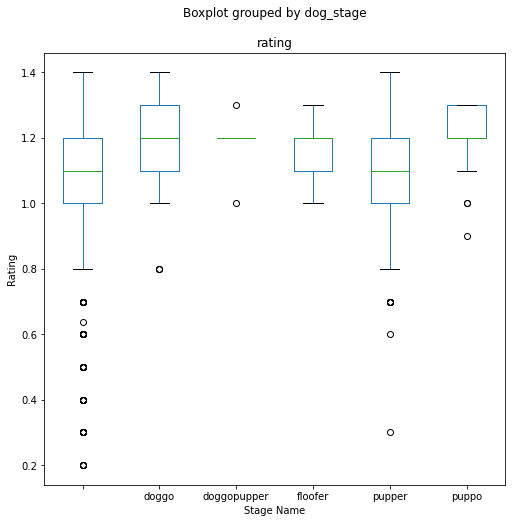

In [65]:
import matplotlib.pyplot as plt

df_clean.boxplot(column=['rating'], by=['dog_stage'], grid = False, figsize = (8,8))
plt.xlabel('Stage Name')
plt.ylabel('Rating');

Excluding the column that is unidentified, doggo has the highest rating among the dogs stages of life name with a tight spread.

#### 2
- The probability that each dog stage would be retweeted

In [76]:
(df_clean.query('dog_stage == "doggo"').count() / df_clean.retweeted_status_id.count())*100

tweet_id                      2.926526
timestamp                     2.926526
retweeted_status_id           2.926526
retweeted_status_user_id      2.926526
retweeted_status_timestamp    0.435866
name                          2.926526
retweet_count                 2.926526
favorite_count                2.926526
dog_stage                     2.926526
rating                        2.926526
dtype: float64

In [75]:
(df_clean.query('dog_stage == "floofer"').count() / df_clean.retweeted_status_id.count())*100

tweet_id                      0.311333
timestamp                     0.311333
retweeted_status_id           0.311333
retweeted_status_user_id      0.311333
retweeted_status_timestamp    0.000000
name                          0.311333
retweet_count                 0.311333
favorite_count                0.311333
dog_stage                     0.311333
rating                        0.311333
dtype: float64

In [73]:
(df_clean.query('dog_stage == "pupper"').count() / df_clean.retweeted_status_id.count())*100

tweet_id                      8.779577
timestamp                     8.779577
retweeted_status_id           8.779577
retweeted_status_user_id      8.779577
retweeted_status_timestamp    0.622665
name                          8.779577
retweet_count                 8.779577
favorite_count                8.779577
dog_stage                     8.779577
rating                        8.779577
dtype: float64

In [74]:
100*(df_clean.query('dog_stage == "puppo"').count() / df_clean.retweeted_status_id.count())

tweet_id                      1.245330
timestamp                     1.245330
retweeted_status_id           1.245330
retweeted_status_user_id      1.245330
retweeted_status_timestamp    0.249066
name                          1.245330
retweet_count                 1.245330
favorite_count                1.245330
dog_stage                     1.245330
rating                        1.245330
dtype: float64

- Doggo has 2.93% chance of being retweeted.
- Floofer has a 0.31% chance of being retweeted.
- Pupper has a 8.78% chance of being retweeted.
- Puppo has a 1.25% chance of being retweeted.

#### 3
- We will see what type of dog stage was favorited the most

In [80]:
df_clean.query('dog_stage == "doggo"').favorite_count.sum()

724196

In [82]:
df_clean.query('dog_stage == "floofer"').favorite_count.sum()

47795

In [83]:
df_clean.query('dog_stage == "pupper"').favorite_count.sum()

989929

In [84]:
df_clean.query('dog_stage == "puppo"').favorite_count.sum()

210339